# Students habits performance

### Import libraries

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

### Load data

In [2]:
df = pd.read_csv("./data/enhanced_student_habits_performance_dataset.csv")

df

,student_id,age,gender,major,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,...,screen_time,study_environment,access_to_tutoring,family_income_range,parental_support_level,motivation_level,exam_anxiety_score,learning_style,time_management_score,exam_score
0,100000,26,Male,Computer Science,7.645367,3.0,0.1,Yes,70.3,6.2,...,10.9,Co-Learning Group,Yes,High,9,7,8,Reading,3.0,100
1,100001,28,Male,Arts,5.700000,0.5,0.4,No,88.4,7.2,...,8.3,Co-Learning Group,Yes,Low,7,2,10,Reading,6.0,99
2,100002,17,Male,Arts,2.400000,4.2,0.7,No,82.1,9.2,...,8.0,Library,Yes,High,3,9,6,Kinesthetic,7.6,98
3,100003,27,Other,Psychology,3.400000,4.6,2.3,Yes,79.3,4.2,...,11.7,Co-Learning Group,Yes,Low,5,3,10,Reading,3.2,100
4,100004,25,Female,Business,4.700000,0.8,2.7,Yes,62.9,6.5,...,9.4,Quiet Room,Yes,Medium,9,1,10,Reading,7.1,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,179995,16,Male,Engineering,3.700000,2.1,1.0,Yes,80.8,6.1,...,8.3,Library,No,Low,1,4,10,Auditory,5.3,88
79996,179996,16,Female,Business,1.200000,0.4,2.9,No,99.5,4.1,...,4.7,Co-Learning Group,No,Low,3,2,10,Kinesthetic,6.8,52
79997,179997,26,Female,Arts,4.100000,1.6,1.6,Yes,46.1,8.3,...,7.5,Dorm,No,Medium,7,1,10,Visual,1.3,89
79998,179998,23,Other,Biology,3.800000,0.6,3.5,Yes,58.7,5.8,...,9.3,Quiet Room,Yes,Low,2,8,7,Kinesthetic,3.7,96


## Data analysis

<Axes: xlabel='gender', ylabel='exam_score'>

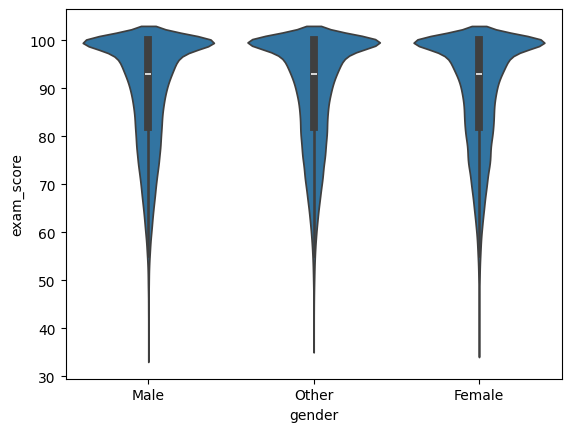

In [12]:
sns.violinplot(data=df, x="gender", y="exam_score")

<Axes: xlabel='family_income_range', ylabel='exam_score'>

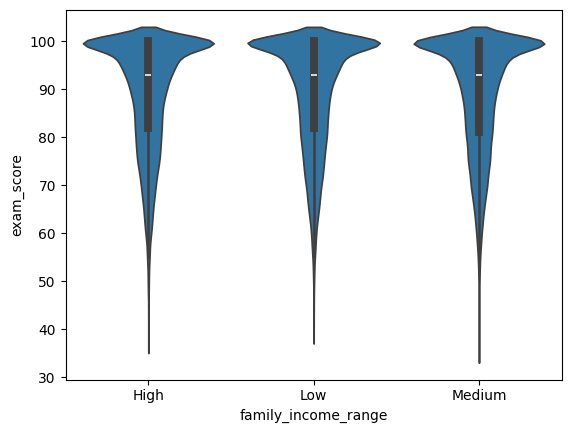

In [13]:
sns.violinplot(data=df, x="family_income_range", y="exam_score")

In [14]:
from scipy.stats import f_oneway
# Separar los grupos
high = df[df["family_income_range"] == "High"]["exam_score"]
medium = df[df["family_income_range"] == "Medium"]["exam_score"]
low = df[df["family_income_range"] == "Low"]["exam_score"]

# Prueba ANOVA
f_stat, p_value = f_oneway(high, medium, low)
print("F-statistic:", f_stat)
print("P-value:", p_value)

F-statistic: 0.8833351424997357
P-value: 0.41340588808752143


Se puede observar que los resultadoos fueron mayores a 0.05, que no hay diferencias significativas entre entre las medias de los 3 grupos, es decir, que el nivel socioeconómico no son variables relevantes en el estudio

In [15]:
#sns.heatmap(df, annot=True, cmap="Blues")

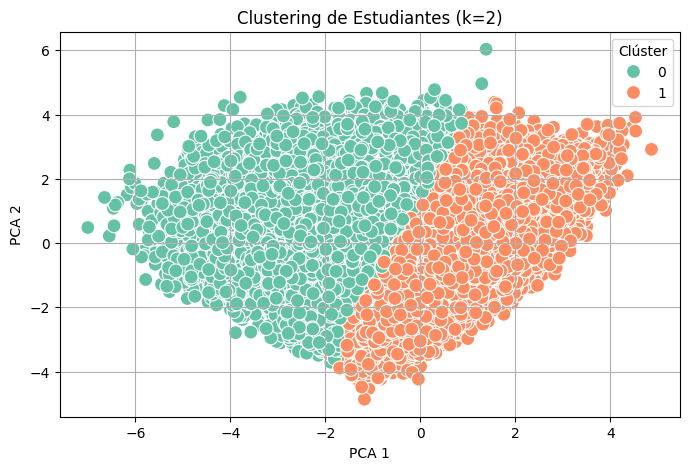

In [ ]:
# Variables numéricas 
features = [
    "study_hours_per_day", "attendance_percentage", "sleep_hours",
    "exercise_frequency", "previous_gpa", "stress_level", "exam_anxiety_score",
    "time_management_score", "exam_score", "screen_time", "mental_health_rating",
    "social_media_hours", "netflix_hours"
]

X = df[features]

# Normalizar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#elegi 2 weas de componentes
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# la hice para pobrar distintos valores de k, elegi 2 al final xd
def plot_kmeans_clusters(k):
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(X_scaled)

    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette="Set2", s=100)
    plt.title(f"Clustering de Estudiantes (k={k})")
    plt.xlabel("PCA 1")
    plt.ylabel("PCA 2")
    plt.legend(title="Clúster")
    plt.grid(True)
    plt.show()

# elegí 2
plot_kmeans_clusters(2)
    

In [17]:
df['cluster'] = KMeans(n_clusters=2, random_state=42).fit_predict(X_scaled)
df.groupby('cluster')[features].mean()


,study_hours_per_day,attendance_percentage,sleep_hours,exercise_frequency,previous_gpa,stress_level,exam_anxiety_score,time_management_score,exam_score,screen_time,mental_health_rating,social_media_hours,netflix_hours
cluster,,,,,,,,,,,,,
0,3.256782,69.932065,6.813545,3.223744,3.046293,5.360992,9.160571,5.472598,75.492336,8.598065,6.748384,2.422659,1.929052
1,4.625220,69.985482,7.117583,3.660465,3.875695,4.841248,8.188092,5.512169,95.847290,10.201173,6.831485,2.540036,2.031508


In [18]:
#sns.pairplot(data=df, hue="gender", palette="Oranges")

social_media_hours, netflix_hours, screen_time: Time spent on various screens.